In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

%matplotlib inline

In [28]:
# Loading boston housing data from sklearn
data = load_boston()

In [29]:
# data is in dictionary form with different required key values. Feature and target are combined to pandas dataframe for analysis
df = pd.concat([pd.DataFrame(data['data']), pd.DataFrame(data['target'])], axis = 1)

In [30]:
# Total features in the boston housing data
feature_names = data['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
# Description of the data and features
data['DESCR'].split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [32]:
# Adding column name in the dataframe
df.columns = list(feature_names) + ["SellingPrice in $1000's"]

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SellingPrice in $1000's
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
df.shape

(506, 14)

In [35]:
df["SellingPrice in $1000's"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: SellingPrice in $1000's, dtype: float64

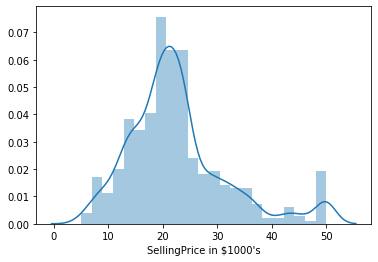

In [36]:
# Distribution of selling price
sns.distplot(df["SellingPrice in $1000's"])

In [39]:
# Correlation matrix
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SellingPrice in $1000's
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### From the above correlation matrix, we can see that there are only two features 'RAD' and 'TAX' with correlation greater than 0.8. So, we drop one of the features ('RAD').

In [44]:
# Check for missing data
total = df.isnull().sum().sort_values(ascending=False)
total

SellingPrice in $1000's    0
LSTAT                      0
B                          0
PTRATIO                    0
TAX                        0
RAD                        0
DIS                        0
AGE                        0
RM                         0
NOX                        0
CHAS                       0
INDUS                      0
ZN                         0
CRIM                       0
dtype: int64

#### From the above result, we can see that there are no missing values in our dataframe.

In [49]:
# Checking for outliers
saleprice_scaled = StandardScaler().fit_transform(df["SellingPrice in $1000's"][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Lower 10 values of the distribution:')
print(low_range)
print('Higher 10 values of the distribution:')
print(high_range)

Lower 10 values of the distribution:
[[-1.90822641]
 [-1.90822641]
 [-1.84292393]
 [-1.76673769]
 [-1.69055146]
 [-1.69055146]
 [-1.66878396]
 [-1.66878396]
 [-1.66878396]
 [-1.64701647]]
Higher 10 values of the distribution:
[[2.98946007]
 [2.98946007]
 [2.98946007]
 [2.98946007]
 [2.98946007]
 [2.98946007]
 [2.98946007]
 [2.98946007]
 [2.98946007]
 [2.98946007]]


#### From the above results, we can see that there is no any outlier in our data.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("SellingPrice in $1000's", axis = 1), df["SellingPrice in $1000's"], test_size=0.2, random_state=3)

In [88]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [93]:
# Linear Regression with regularization

reg = Ridge()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
print("Root mean squared error: {}".format(sqrt(mean_squared_error(y_test, y_predict))))

Root mean squared error: 4.185530560389449
